# Importing Libraries
Numpy, Pandas, Matplotlib(pyplot) and fbprophet (Facebook's API used for prediction and forecasts.)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fbprophet as Prophet

data=pd.read_csv("/content/KALYANKJIL.NS.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-26,73.949997,81.000000,72.900002,75.199997,75.199997,51421860
1,2021-03-30,75.949997,77.900002,69.650002,70.849998,70.849998,11091947
2,2021-03-31,71.750000,71.750000,67.650002,68.099998,68.099998,4659613
3,2021-04-01,68.599998,72.750000,68.199997,71.400002,71.400002,7403570
4,2021-04-05,71.500000,71.500000,68.550003,69.900002,69.900002,2399032


# Visualization of the "Close" column.

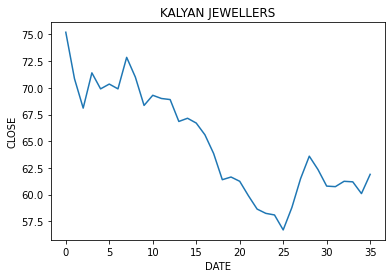

In [25]:
close=data['Close']
ax=close.plot(title="KALYAN JEWELLERS")
ax.set_xlabel("DATE")
ax.set_ylabel("CLOSE")
plt.show()

We only need two columns from this dataset which are date and close.

In [26]:
data["Date"]=pd.to_datetime(data["Date"],infer_datetime_format=True)
data=data[["Date","Close"]]

We are using Facebook Prophet model,  for predicting the stock prices of Tesla

In [27]:
data=data.rename(columns={"Date":"ds","Close":"y"})

# Prediction

In [28]:
model=Prophet.Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
396,2022-05-17,95.034235,-38.965852,224.800624
397,2022-05-18,94.210859,-40.781147,226.047180
398,2022-05-19,95.128658,-40.676196,226.655664
399,2022-05-20,95.618395,-40.223097,227.497293
400,2022-05-21,-18.893215,-155.380407,112.483955


# Visualizing the predicted model

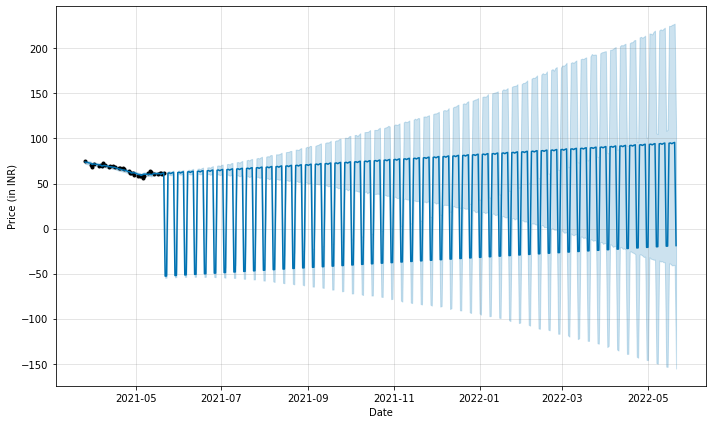

In [31]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price (in INR)")

This is a odd scenario when the model doesn't get enough data on a company's stock prices. Here, in case of Kalyan Jewellers we see a unstable prediction. The graph says it could go as low as -152 or as high as +230. Where the ideal price range lies between -25 and +100. We should not encourage prediction in such a scenario, where the price range is predicted to be so vulnerable.